In [1]:
import numpy as np
import astropy
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import matplotlib
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import norm
from scipy.ndimage import shift
from scipy.optimize import curve_fit
import matplotlib.path
!pip install photutils
from photutils.aperture import CircularAnnulus
from photutils.datasets import make_100gaussians_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.0/857.0 kB 6.2 MB/s eta 0:00:00


In [2]:
image_JWST_560w = get_pkg_data_filename("/content/SPT2147-50_JWST_560w_target_crop_bkg.fits")

In [3]:
image_data_JWST_560w = fits.getdata(image_JWST_560w, ext=0)

In [4]:
noise_560w = get_pkg_data_filename("/content/JWSTNoiseMap50_560w.fits")

In [5]:
noise_data_560w = fits.getdata(noise_560w)

In [6]:
SNR_560w = image_data_JWST_560w/noise_data_560w

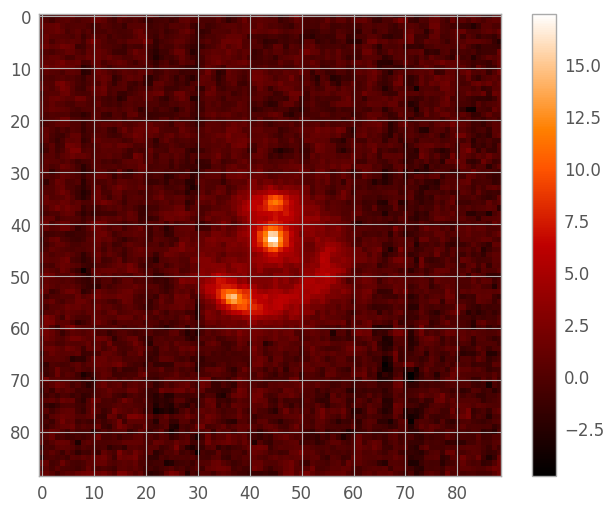

In [7]:
plt.imshow(SNR_560w)
plt.colorbar()

In [8]:
np.max(SNR_560w)

17.445707

In [9]:
np.shape(SNR_560w)


(89, 89)

In [10]:
np.where(SNR_560w==np.max(SNR_560w))

(array([43]), array([44]))

In [80]:
#pd.DataFrame(SNR_560w).to_csv('SNR_560w.csv')

In [18]:
#image_HST = get_pkg_data_filename("/content/SPT2147-50_HST_target_crop.fits")
#image_data_HST = fits.getdata(image_HST, ext=0)
#noise_HST = get_pkg_data_filename("/content/HSTNoiseMap50.fits")
#noise_data_HST = fits.getdata(noise_HST)

In [19]:
#SNR_HST = image_data_HST/noise_data_HST
#plt.imshow(SNR_HST)
#plt.colorbar()

In [20]:
#np.max(SNR_HST)

In [21]:
#np.shape(SNR_HST)

In [22]:
#SNR_HST

In [23]:
#np.where(SNR_HST==np.max(SNR_HST))

In [24]:
#snrhst = fits.PrimaryHDU(SNR_HST)
#snrhst.writeto('SNR_HST.fits', overwrite = True)

In [25]:
#pd.DataFrame(SNR_HST).to_csv('SNR_HST.csv')

In [26]:
#mask_hst_snr3 = np.asarray(pd.read_csv('HST_w_444_SNR3_borders.csv', sep = ',', header = None))
#np.shape(mask_hst_snr3)

In [27]:
#snr3_borders = fits.PrimaryHDU(mask_hst_snr3)
#snr3_borders.writeto('HST_w_444_SNR3_borders.fits', overwrite = True)

In [28]:
#mask_hst = np.asarray(pd.read_csv('SNR_HST_Mask.csv', sep = ',', header = None))
#np.shape(mask_hst)

In [29]:
#mask_hst

In [30]:
#mask_hst_fits = fits.PrimaryHDU(mask_hst)
#mask_hst_fits.writeto('mask_HST_w444w.fits', overwrite = True)

In [39]:
data = SNR_560w
positions = [44.5,43]
aperture = CircularAnnulus(positions,r_in = 4.5, r_out = 16)

In [40]:
masks = aperture.to_mask(method = 'center')

In [41]:
bigmask = masks.to_image(shape = (89,89))

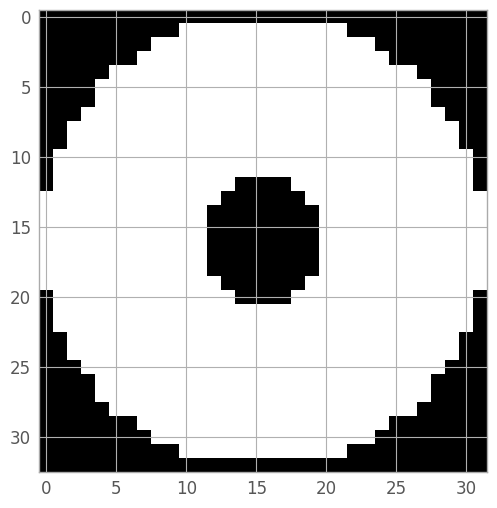

In [42]:
plt.imshow(masks)

(<matplotlib.patches.PathPatch at 0x7bc227c8d900>,)

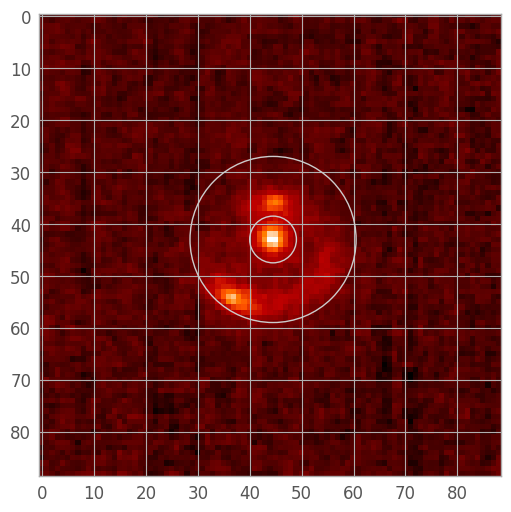

In [43]:
plt.imshow(SNR_560w)
aperture.plot()

In [44]:
bigmask.shape

(89, 89)

In [45]:
jwstfinalmask = fits.PrimaryHDU(bigmask)
jwstfinalmask.writeto('JWST_560w_mask.fits', overwrite = True)

In [48]:
#borders_mask_444w = get_pkg_data_filename("/content/HST_w_444_SNR3_borders.fits")

In [49]:
#borders_mask_data_444w = fits.getdata(borders_mask_444w)

In [24]:
#np.shape(borders_mask_data_444w)

In [51]:
#HST_mask_combined = np.array([borders_mask_data_444w,bigmask])

In [25]:
#np.shape(HST_mask_combined)

In [26]:
#HST_mask_final = np.max(HST_mask_combined, axis = 0)

In [27]:
#np.shape(HST_mask_final)

In [28]:
#hstfinalmask = fits.PrimaryHDU(HST_mask_final)
#hstfinalmask.writeto('HST_mask_final.fits', overwrite = True)

In [29]:
#with np.printoptions(threshold=np.inf): # Verify the location of the Nan values which resulted from shifting
    #print(bigmask)